In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_maze(maze, start_state, exit_state):
    fig, ax = plt.subplots(figsize=(8, 8))
    rows,cols=maze.shape[:2]
    for i in range(rows):
        for j in range (cols):
            walls=maze[(i,j)]
            if walls[0]: #up
                ax.plot([j, j + 1], [rows - i, rows - i], color='black', linewidth=3)
            if walls[1]: # bottom
                ax.plot([j, j + 1], [rows - i - 1, rows - i - 1], color='black', linewidth=3)
            # Left wall
            if walls[2]: #left
                ax.plot([j, j], [rows - i - 1, rows - i], color='black', linewidth=3)

            if walls[3]: #right
                ax.plot([j + 1, j + 1], [rows - i - 1, rows - i], color='black', linewidth=3)
    
    for i in range(rows):
        ax.plot([i, i], [0, 4], color="black", linestyle=':', alpha=0.3)  # Vertical grid lines
        ax.plot([0, 4], [i, i], color="black", linestyle=':', alpha=0.3)  # Horizontal grid lines
                
    ax.text(start_state[1] + 0.5, rows - start_state[0] - 0.5, 'Start', va='center', ha='center', fontsize=25, color='white' ,bbox=dict(facecolor='green', alpha=0.5, pad=10))
    ax.text(exit_state[1] + 0.5, rows - exit_state[0] - 0.5, 'Exit', va='center', ha='center', fontsize=25, color='white', bbox=dict(facecolor='blue', alpha=0.5, pad=10))


    # x, y = start_state[1], rows - start_state[0]
    # ax.arrow(x + 0.5, y , 0, -0.25, fc='green',ec='green',width= 0.05,head_width= 0.2,head_length= 0.2 )

     
    # x, y = exit_state[1], rows - exit_state[0] 
    # ax.arrow(x + 0.5, y - 0.5, 0, -0.25, fc='blue',ec='blue',width= 0.05,head_width= 0.2,head_length= 0.2)

    ax.set_xticks([])
    ax.set_yticks([])

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [9]:
def plot_policy(maze,policy):
    fig, ax = plt.subplots(figsize=(8, 8))
    rows,cols=maze.shape[:2]
    for i in range(rows):
        for j in range (cols):
            walls=maze[(i,j)]
            if walls[0]: #up
                ax.plot([j, j + 1], [rows - i, rows - i], color='black', linewidth=3)
            if walls[1]: # bottom
                ax.plot([j, j + 1], [rows - i - 1, rows - i - 1], color='black', linewidth=3)
            # Left wall
            if walls[2]: #left
                ax.plot([j, j], [rows - i - 1, rows - i], color='black', linewidth=3)

            if walls[3]: #right
                ax.plot([j + 1, j + 1], [rows - i - 1, rows - i], color='black', linewidth=3)
   

    # Plot policy
    if policy is not None:
        for i in range(rows):
            for j in range(cols):
                center_y, center_x = rows - i - 0.5, j + 0.5
                ax.plot(center_y, center_x, 'o',c='blue')

                if type(policy[(i,j)]) is np.float64:
                    dx, dy = 0, 0
                    if policy[(i,j)] == 0:  # up
                        dy = 0.25
                    elif policy[(i,j)] == 1:  # down
                        dy = -0.25
                    elif policy[(i,j)] == 2:  # left
                        dx = -0.25
                    elif policy[(i,j)] == 3:  # right
                        dx = 0.25
                    
                    ax.arrow(center_x, center_y, dx* 1.3, dy*1.3, 
                            fc='red', ec='red', 
                            width=0.03, 
                            head_width=0.1 , 
                            head_length=0.1 , 
                            alpha=0.7)
                
                else:
                    for action, prob in enumerate(policy[i, j]):
                        if prob > 0:
                            dx, dy = 0, 0
                            if action == 0:  # up
                                dy = 0.25
                            elif action == 1:  # down
                                dy = -0.25
                            elif action == 2:  # left
                                dx = -0.25
                            elif action == 3:  # right
                                dx = 0.25
                            
                            ax.arrow(center_x, center_y, dx* (prob+0.3), dy*(prob+0.3), 
                                    fc='red', ec='red', 
                                    width=0.03, 
                                    head_width=0.1 , 
                                    head_length=0.1 , 
                                    alpha=0.7)

    ax.set_xticks([])
    ax.set_yticks([])

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [10]:
def plot_value_function(v):
    rows,cols=v.shape[:2]
    plt.imshow(v, cmap='Greys')  
    for i in range(rows):
        for j in range (cols):
            plt.text(j, i, f'{round(v[i, j],2)}', ha='center', va='center', color='r', fontsize=15)
    plt.xticks([]) # Hide the x-axis values
    plt.yticks([]) # Hide the y-axis values
    plt.show() 

In [11]:
from rich.console import Console
from rich.tree import Tree
def print_transition(T):
    console = Console()
    def build_tree(data, parent_tree):
        for i, row in enumerate(data):
            row_tree = parent_tree.add(f"Row {i}")
            for j, col in enumerate(row):
                col_tree = row_tree.add(f"Col {j}")
                for k,action in enumerate(col):
                    action_tree = col_tree.add(f"action {k}")
                    for k, v in action.items():
                        action_tree.add(f"[cyan]{k}[/cyan]: [magenta]{v}[/magenta]")

    # Create a root tree
    root_tree = Tree("NumPy Array Structure")
    build_tree(T.tolist(), root_tree)

    # Print the tree to the console
    console.print(root_tree)

In [15]:
#four possible actions 
actions = ['up', 'down', 'left', 'right']

start_state = (0,0)
exit_state = (3,3)

step_limit = 30

maze = np.array([[[0,1,0,0], [0,1,0,0], [0,0,0,0], [0,1,0,0]], 
        [[1,0,0,1], [1,1,1,1], [0,0,1,1], [1,1,1,0]], 
        [[0,0,0,1], [1,0,1,0], [0,1,0,1], [1,0,1,0]],
        [[0,0,0,1], [0,0,1,1], [1,0,1,1], [0,0,1,0]]])

#discount rate 
gamma = 0.9

def get_reward(curr_state , next_state):
    if curr_state != exit_state:
        return -1 
    elif curr_state == next_state: 
        return -10
    elif next_state == exit_state:
        return +50

#diterministic policy
pi1= [[[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]], [[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0]], [[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]], [[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0]]]
#stochastic policy
pi2= [[[0, 0.8, 0.2, 0], [0.2, 0.8, 0, 0], [0.2, 0.8, 0, 0], [0, 0.7, 0, 0.3]], [[0, 0, 0.9, 0.1], [0, 0, 0.9, 0.1], [0, 0, 0.9, 0.1], [0.2, 0.8, 0, 0]], [[0, 0, 0.5, 0.5], [1, 0, 0, 0], [0.1, 0.9, 0, 0], [0, 0, 1, 0]], [[0, 0, 0.1, 0.9], [0, 0, 0.1, 0.9], [0.2, 0.8, 0, 0], [0, 0, 1, 0]]]

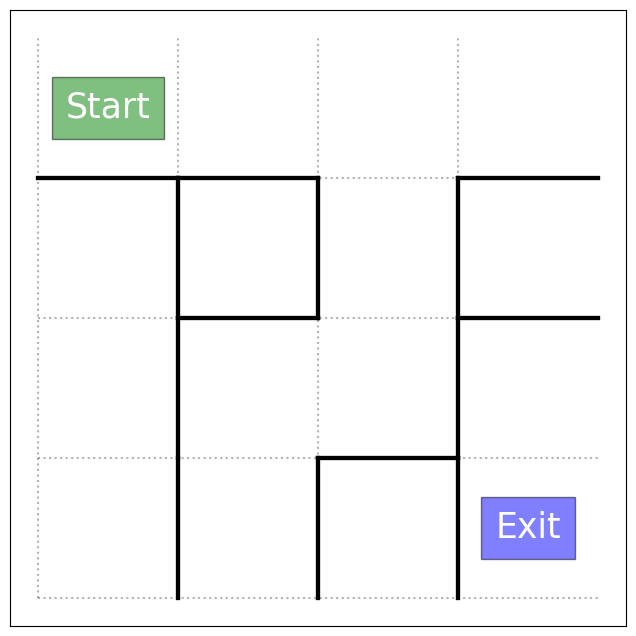

In [16]:
plot_maze(maze, start_state, exit_state)